In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import linear_model
import sklearn.metrics as sm

# Leitura do dataset
O <i>dataset</i> utilizado foi retirado da pasta de planilhas disponível no moodle, foi escolhida a base iris para a análise.

In [21]:
data = pd.read_csv('iris.csv', header = (0)) #Leitura do dataset com extensão.csv
print("Números de linhas e colunas: ", data.shape)
#data.head(25)

Números de linhas e colunas:  (150, 5)


# Pré-tratamento dos dados
Neste caso, executamos o processo de limpeza do <i>dataset</i> para remover dados duplicados e <b>NaN</b> a fim de deixar os dados mais trabalháveis, evitando que haja algum tipo de ruído na hora de fazer a análise.

In [26]:
data = data.replace('?', np.nan)
print("Numero de linhas e colunas: ", data.shape)
data.head(25)

Numero de linhas e colunas:  (147, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [23]:
data = data.dropna()
print("Numero de linhas e colunas: ", data.shape)
#data.head(25)

Numero de linhas e colunas:  (150, 5)


In [24]:
data = data.drop_duplicates()
print("Numero de linhas e colunas: ", data.shape)
#data.head(60)

Numero de linhas e colunas:  (147, 5)


# Escolha de x e y
Levando em consideração todas as colunas, achamos interessante recolher os dados de <i>sepal_length</i> e <i>petal_length</i> e basear a nossa análise nessas duas colunas.

In [25]:
sepal_length = data['sepal_length'] 
petal_length = data['petal_length']

# Cálculo de média, variância, mediana, desvio padrão e histograma de <i>Sepal Length</i> e <i>Petal Length</i>.
Para os cálculos propostos, utilizamos a biblioteca numpy com as funções mean, var, median e a std. O histogramas foram criados utizando a função histogram do numpy e os <i>plots</i> foram feitos utilizando a biblioteca matplotlib.
O retorno do histograma, como descrito em aula, é um gráfico de frequência pela variável escolhida(<i>Sepal Length</i> ou <i>Petal Length</i>)

In [2]:
print('Variância da Largura das Sépalas: %.3f' %np.var(sepal_length)) #Variância - Medida de dispersão que mostra quão distantes os valores estão da média
print('Média de Largura das Sépalas: %.3f' %np.mean(sepal_length)) #Média
print('Mediana da Largura das Sépalas: %.3f' %np.median(sepal_length)) # Mediana - Valor 
print('Desvio Padrão da Largura das Sépalas: %.3f' %np.std(sepal_length, ddof = 1)) #Desvio Padrão - Indica qual é o “erro” se quiséssemos substituir um dos valores coletados pelo valor da média

plt.style.use('seaborn-whitegrid')
plt.hist(sepal_length, bins= 20, facecolor = '#E0364D', edgecolor='#AD2A3B', alpha = 0.9)
plt.title("Frequência x da Largura das Sépalas")
plt.ylabel("Frequência")
plt.xlabel("Largura das Sépalas")
plt.figure(figsize=(15,10))
plt.show() #chama o plot do gráfico

NameError: name 'plt' is not defined

Variância da Largura das Pétalas: 3.073
Média de Largura das Pétalas: 3.780
Mediana da Largura das Pétalas: 4.400
Desvio Padrão da Largura das Pétalas: 1.759


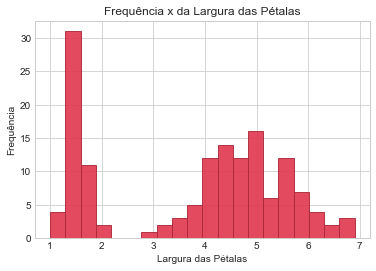

In [28]:
print('Variância da Largura das Pétalas: %.3f' %np.var(petal_length))
print('Média de Largura das Pétalas: %.3f' %np.mean(petal_length))
print('Mediana da Largura das Pétalas: %.3f' %np.median(petal_length))
print('Desvio Padrão da Largura das Pétalas: %.3f' %np.std(petal_length, ddof = 1))

plt.style.use('seaborn-whitegrid')
plt.hist(petal_length, bins= 20, facecolor = '#E0364D', edgecolor='#AD2A3B', alpha = 0.9)
plt.title("Frequência x da Largura das Pétalas")
plt.ylabel("Frequência")
plt.xlabel("Largura das Pétalas")
plt.show()

# Cálculo da correlação entre as variáveis <i>sepal_length</i> e <i>petal_length</i> 
Os cálculos foram feitos utilizando a correlação de pearson, por meio da função pearsonr da biblioteca scipy.stats.
O resultado mostra uma correlação positiva, indicando que as duas variáveis crescem na mesma direção, no caso presente, esse coeficiente é alto e positivo, entre 0.7 e 0.9, portanto as variáveis possuem uma correlação forte crescendo na mesma direção. O resultado da correlação interferirá na inclinação da reta na regressão linear.

In [29]:
tam = len(sepal_length)  #tamanho das colunas

corr, p_value = pearsonr(sepal_length, petal_length) # calcula a correlação

print("Correlação de Pearson: %.3f" %corr)

Correlação de Pearson: 0.871


# Passagem de dados para o dataframe
Aqui utilizamos o dataframe da biblioteca pandas para armazenar de maneira "unida" x e y a fim de passar os valores para a regressão linear.

In [30]:
dataframe = pd.DataFrame()
dataframe['x'] = sepal_length  # tamanho da celula
dataframe['y'] = petal_length # forma da celula
x_values = dataframe[['x']]
y_values = dataframe[['y']]

# Criação do modelo de regressão linear
Aqui utilizamos a função linear_model da biblioteca sklearn para gerar nosso modelo. Pode se notar que a linha de tendência tem uma inclinação muito baixa, o que comprova a correlação neutra das variáveis <i>sepal_length</i> e <i>petal_length</i>. A equação da regressão linear nos permite achar o <i>petal_length</i> aproximado de uma Iris com determinada <i>sepal_length</i> apenas trocando o x da equação pela própria <i>sepal_length</i>

In [31]:
#Modelo de regressão linear
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

#imprimindo os valores
print('Utilizando biblioteca scikit-learn no python')
print('y = ax + b')
a = model.coef_[0][0]
b = model.intercept_[0]
print('a = %.2f = Coeficiente angular - inclinação da linha de tendência' % a)
print('b = %.2f = O ponto de interceptação do eixo y.' % b)
print()
print('Equação da regressão linear:')
print('y = {}x + {}'.format(a, b))

Utilizando biblioteca scikit-learn no python
y = ax + b
a = 1.85 = Coeficiente angular - inclinação da linha de tendência
b = -7.05 = O ponto de interceptação do eixo y.

Equação da regressão linear:
y = 1.8486570976173178x + -7.046319015909856


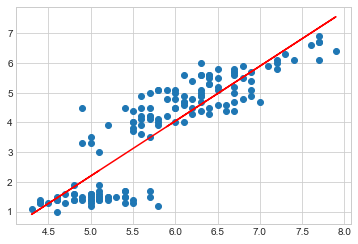

In [32]:
#Gráfico da regressão linear
y_pred = model.predict(x_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_pred, color='red')
plt.show()

# Métricas de avaliação para a regressão linear
<b>Mean Squared Error</b>: é uma das métricas mais utilizadas para calcular erros em predições, inclusive em regressões lineares, ela pode ser calculada como a soma dos erros da linha ao quadrado, sendo que o erro ao quadrado de determinado ponto <b>n</b> se dá por <b>(y_n - (mx_n + b))^2</b> que é a distância vertical da reta para o ponto <b>n</b>. Quanto menor o MSE, melhor a predição do modelo.
<b>Coeficiente de determinação (R2 score)</b> Expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Quanto mais próximo de 1, mais ajustável a amosta ele é.
Obs: funções que terminam com _error ou _loss retornam valores que devem ser minimizados, enquanto funções que terminam com _score retornam valores que devem ser maximizados.

In [33]:
print("Mean squared error =", round(sm.mean_squared_error(y_values, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_values, y_pred), 2))

Mean squared error = 0.74
R2 score = 0.76


# Regressão Logística
Enquanto na Regressão Linear temos uma variável resposta contínua, na Regressão Logística nossa variável resposta é binária, 0 ou 1, sim ou não. Essa análise é, normalmente, utilizada quando se quer medir a relação de uma variável dependente binária com uma ou mais variáveis independentes, sendo que as independentes tanto podem ser categóricas ou não.
A Regressão Logística é uma análise que nos permite estimar a probabilidade associada à ocorrência de determinado evento em face de um conjunto de variáveis explanatórias. As vantagens desse tipo de regressão incluem: (a) facilidade para lidar com variáveis independentes categóricas; (b) fornece resultados em termos de probabilidade; (c) facilidade de classificação de indivíduos em categorias; (d) requer pequeno número de suposições; e (e) possui alto grau de confiabilidade.

<img src="https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg" width="600"></img>
<img src="https://mllog.github.io/img/pythonmlch2/adaline.png" width="600"></img>

In [34]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [35]:
X_reg = data.iloc[:, :-1] #Recebe todas as colunas menos a última
y_reg = data.iloc[:, -1] #Recebe a última coluna
h = .02  # step size in the mesh
X_reg = StandardScaler().fit_transform(X_reg)

In [36]:
#Separa os conjuntos de treino e teste em 80% e 20% respectivamente.
X_train, X_test, Y_train, Y_test = train_test_split(X_reg, y_reg, test_size = 0.2, random_state = 42)

In [37]:
#Treina o modelo 
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

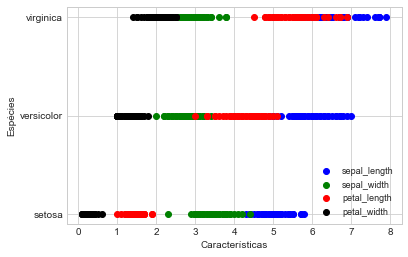

In [38]:
#Mostra a relação de cada característica com cada espécie de Íris

plt.xlabel('Características')
plt.ylabel('Espécies')

pltX = data.loc[:, "sepal_length"]
pltY = data.loc[:, "species"]
plt.scatter(pltX, pltY, color= "blue", label = "sepal_length")

pltX = data.loc[:, "sepal_width"]
pltT = data.loc[:, "species"]
plt.scatter(pltX, pltY, color= "green", label = "sepal_width")

pltX = data.loc[:, "petal_length"]
pltY = data.loc[:, "species"]
plt.scatter(pltX, pltY, color= "red", label = "petal_length")

pltX = data.loc[:, "petal_width"]
pltY = data.loc[:, "species"]
plt.scatter(pltX, pltY, color= "black", label = "petal_width")

plt.legend(loc = 4, prop={'size':9})
plt.show()

# Métricas de avaliação para a classificação
Antes de tudo, devemos levar em consideração algumas notações sobre como é tratado o resultado de cada predição.

FP (Falso positivo): Ocorre quando a classe atual é negativa, mas a predição retorna resultado positivo.
FN (Falso negativo): Ocorre quando a classe atual é positiva, mas a predição retorna resultado negativo.
VP (Verdadeiro positivo): Ocorre quando a classe atual é positiva, e a predição retorna resultado positivo.
VN (Verdadeiro negativo): Ocorre quando a classe atual é positiva, e a predição retorna resultado positivo.

<b>Precisão</b>: É a relação entre os verdadeiros positivos e todos os positivos retornados - VP / (VP + FP), uma alta precisão indica uma baixa taxa de falsos positivos.

<b>Sensibilidade</b>: É a relação entre os verdadeiros positivos e a soma dos verdadeiros positivos com os falsos negativos.

<b>F1-Score</b>: A pontuação F1 é a média ponderada de precisão e sensibilidade. Portanto, essa pontuação leva em consideração os falsos positivos e os falsos negativos. Intuitivamente, não é tão fácil de entender quanto a acurácia, mas F1 geralmente é mais útil do que a acurácia, especialmente se você tiver uma distribuição de classes desigual. A acurácia funciona melhor se falsos positivos e falsos negativos tiverem custos semelhantes. Se o custo de falsos positivos e falsos negativos são muito diferentes, é melhor olhar para precisão e sensibilidade. - 2*( Precisão * Sensibilidade) / (Precisão * Sensibilidade)

In [40]:
#Testa o modelo
predicoes = model.predict(X_test)

#print(predicoes)
#print(Y_test)

#Retorna métricas de avaliação
print(classification_report(Y_test, predicoes))
print("Acurácia: {:.2f}%" .format(accuracy_score(Y_test, predicoes) * 100))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Acurácia: 96.67%
